TO DO


- encode target: background (1), benign (2), probing (3), bruteforce (4), Bruteforce-XML (5), XMRIGCC CryptoMiner (6)


- milih jenis ML yang cocok --> pycaret


- eda pake pandas-profiling


- cari kaitan antar masing-masing feature


- preprocessing: balancing class, mengatasi skewness (z-score standardization), drop high cardinality (high unique value) columns: id, handle highly correlated columns (drop salah satu), handling outliers

#LIBRARIES

In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install pycaret pandas shap

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
from pycaret.classification import *

#IMPORT DATASET

In [ ]:
train = pd.read_csv('train.csv', sep=',')
train.head()

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.00,...,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.00,...,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.75,...,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.00,...,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0,Benign


In [ ]:
final_df = pd.read_csv('final_df.csv', sep=',')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205218 entries, 0 to 205217
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   response_port                205218 non-null  float64
 1   flow_duration                205218 non-null  float64
 2   forward_packets_per_sec      205218 non-null  float64
 3   flow_packets_per_sec         205218 non-null  float64
 4   down_up_ratio                205218 non-null  float64
 5   flow_SYN_flags               205218 non-null  float64
 6   flow_RST_flags               205218 non-null  float64
 7   forward_PSH_flags            205218 non-null  float64
 8   backward_PSH_flags           205218 non-null  float64
 9   forward_URG_flags            205218 non-null  float64
 10  forward_pkts_payload         205218 non-null  float64
 11  backward_pkts_payload        205218 non-null  float64
 12  flow_pkts_payload            205218 non-null  float64
 13 

In [3]:
test = pd.read_csv('test.csv', sep=',')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            138805 non-null  object 
 1   origin_host                   138805 non-null  object 
 2   origin_port                   138805 non-null  int64  
 3   response_host                 138805 non-null  object 
 4   response_port                 138805 non-null  int64  
 5   flow_duration                 86780 non-null   float64
 6   forward_packets_per_sec       96316 non-null   float64
 7   backward_packets_per_sec      91138 non-null   float64
 8   flow_packets_per_sec          90465 non-null   float64
 9   down_up_ratio                 98791 non-null   float64
 10  flow_FIN_flags                115082 non-null  float64
 11  flow_SYN_flags                108899 non-null  float64
 12  flow_RST_flags                93683 non-null

#CLEANING

##TRAIN

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            416473 non-null  object 
 1   origin_host                   416473 non-null  object 
 2   origin_port                   416473 non-null  int64  
 3   response_host                 416473 non-null  object 
 4   response_port                 416473 non-null  int64  
 5   flow_duration                 299409 non-null  float64
 6   forward_packets_per_sec       293081 non-null  float64
 7   backward_packets_per_sec      324234 non-null  float64
 8   flow_packets_per_sec          304723 non-null  float64
 9   down_up_ratio                 292858 non-null  float64
 10  flow_FIN_flags                304424 non-null  float64
 11  flow_SYN_flags                325463 non-null  float64
 12  flow_RST_flags                311037 non-nul

In [ ]:
#pisahkan fitur object dengan fitur numerik
train_object = train.select_dtypes(include=['object'])
train_numeric = train.select_dtypes(exclude=['object'])

###HANDLING OUTLIER

In [ ]:
# Inisialisasi daftar indeks untuk menyimpan baris yang mengandung outlier
outlier_indices = set()

In [ ]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   origin_port                   416473 non-null  int64  
 1   response_port                 416473 non-null  int64  
 2   flow_duration                 299409 non-null  float64
 3   forward_packets_per_sec       293081 non-null  float64
 4   backward_packets_per_sec      324234 non-null  float64
 5   flow_packets_per_sec          304723 non-null  float64
 6   down_up_ratio                 292858 non-null  float64
 7   flow_FIN_flags                304424 non-null  float64
 8   flow_SYN_flags                325463 non-null  float64
 9   flow_RST_flags                311037 non-null  float64
 10  forward_PSH_flags             299948 non-null  float64
 11  backward_PSH_flags            352919 non-null  float64
 12  flow_ACK_flags                288942 non-nul

In [ ]:
# Loop melalui setiap kolom
for column in train_numeric.columns:
    Q1 = train_numeric[column].quantile(0.25)
    Q3 = train_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outliers dan tambahkan indeksnya ke dalam set
    outliers = train_numeric[(train_numeric[column] < lower_bound) | (train_numeric[column] > upper_bound)]
    outlier_indices.update(outliers.index)

# Hapus semua baris yang mengandung outlier
train_numeric = train_numeric.drop(index=outlier_indices)

#periksa dataset
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148955 entries, 3 to 416471
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   origin_port                   148955 non-null  int64  
 1   response_port                 148955 non-null  int64  
 2   flow_duration                 103446 non-null  float64
 3   forward_packets_per_sec       99184 non-null   float64
 4   backward_packets_per_sec      118583 non-null  float64
 5   flow_packets_per_sec          110687 non-null  float64
 6   down_up_ratio                 98196 non-null   float64
 7   flow_FIN_flags                108832 non-null  float64
 8   flow_SYN_flags                120876 non-null  float64
 9   flow_RST_flags                108073 non-null  float64
 10  forward_PSH_flags             108810 non-null  float64
 11  backward_PSH_flags            129156 non-null  float64
 12  flow_ACK_flags                105050 non-null  fl

###HANDLING MISSING VALUE

In [ ]:
#isi NaN dengan mean
mean_flow_duration = train_numeric['flow_duration'].mean() #5
train_numeric['flow_duration'].fillna(mean_flow_duration, inplace=True)

mean_forward_packets_per_sec = train_numeric['forward_packets_per_sec'].mean() #6
train_numeric['forward_packets_per_sec'].fillna(mean_forward_packets_per_sec, inplace=True)

mean_backward_packets_per_sec = train_numeric['backward_packets_per_sec'].mean() #7
train_numeric['backward_packets_per_sec'].fillna(mean_backward_packets_per_sec, inplace=True)

mean_flow_packets_per_sec = train_numeric['flow_packets_per_sec'].mean() #8
train_numeric['flow_packets_per_sec'].fillna(mean_flow_packets_per_sec, inplace=True)

mean_down_up_ratio = train_numeric['down_up_ratio'].mean() #9
train_numeric['down_up_ratio'].fillna(mean_down_up_ratio, inplace=True)

mean_flow_FIN_flags = train_numeric['flow_FIN_flags'].mean() #10
train_numeric['flow_FIN_flags'].fillna(mean_flow_FIN_flags, inplace=True)

mean_flow_SYN_flags = train_numeric['flow_SYN_flags'].mean() #11
train_numeric['flow_SYN_flags'].fillna(mean_flow_SYN_flags, inplace=True)

mean_flow_RST_flags = train_numeric['flow_RST_flags'].mean() #12
train_numeric['flow_RST_flags'].fillna(mean_flow_RST_flags, inplace=True)

mean_forward_PSH_flags = train_numeric['forward_PSH_flags'].mean() #13
train_numeric['forward_PSH_flags'].fillna(mean_forward_PSH_flags, inplace=True)

mean_backward_PSH_flags = train_numeric['backward_PSH_flags'].mean() #14
train_numeric['backward_PSH_flags'].fillna(mean_backward_PSH_flags, inplace=True)

mean_flow_ACK_flags = train_numeric['flow_ACK_flags'].mean() #15
train_numeric['flow_ACK_flags'].fillna(mean_flow_ACK_flags, inplace=True)

mean_forward_URG_flags = train_numeric['forward_URG_flags'].mean() #16
train_numeric['forward_URG_flags'].fillna(mean_forward_URG_flags, inplace=True)

mean_backward_URG_flags = train_numeric['backward_URG_flags'].mean() #17
train_numeric['backward_URG_flags'].fillna(mean_backward_URG_flags, inplace=True)

mean_flow_CWR_flags = train_numeric['flow_CWR_flags'].mean() #18
train_numeric['flow_CWR_flags'].fillna(mean_flow_CWR_flags, inplace=True)

mean_flow_ECE_flags = train_numeric['flow_ECE_flags'].mean() #19
train_numeric['flow_ECE_flags'].fillna(mean_flow_ECE_flags, inplace=True)

mean_forward_pkts_payload = train_numeric['forward_pkts_payload'].mean() #20
train_numeric['forward_pkts_payload'].fillna(mean_forward_pkts_payload, inplace=True)

mean_backward_pkts_payload = train_numeric['backward_pkts_payload'].mean() #21
train_numeric['backward_pkts_payload'].fillna(mean_backward_pkts_payload, inplace=True)

mean_flow_pkts_payload = train_numeric['flow_pkts_payload'].mean() #22
train_numeric['flow_pkts_payload'].fillna(mean_flow_pkts_payload, inplace=True)

mean_forward_iat = train_numeric['forward_iat'].mean() #23
train_numeric['forward_iat'].fillna(mean_forward_iat, inplace=True)

mean_backward_iat = train_numeric['backward_iat'].mean() #24
train_numeric['backward_iat'].fillna(mean_backward_iat, inplace=True)

mean_flow_iat = train_numeric['flow_iat'].mean() #25
train_numeric['flow_iat'].fillna(mean_flow_iat, inplace=True)

mean_payload_bytes_per_sec = train_numeric['payload_bytes_per_sec'].mean() #26
train_numeric['payload_bytes_per_sec'].fillna(mean_payload_bytes_per_sec, inplace=True)

mean_forward_subflow_packets = train_numeric['forward_subflow_packets'].mean() #27
train_numeric['forward_subflow_packets'].fillna(mean_forward_subflow_packets, inplace=True)

mean_backward_subflow_packets = train_numeric['backward_subflow_packets'].mean() #28
train_numeric['backward_subflow_packets'].fillna(mean_backward_subflow_packets, inplace=True)

mean_forward_subflow_bytes = train_numeric['forward_subflow_bytes'].mean() #29
train_numeric['forward_subflow_bytes'].fillna(mean_forward_subflow_bytes, inplace=True)

mean_backward_subflow_bytes = train_numeric['backward_subflow_bytes'].mean() #30
train_numeric['backward_subflow_bytes'].fillna(mean_backward_subflow_bytes, inplace=True)

mean_forward_bulk_bytes = train_numeric['forward_bulk_bytes'].mean() #31
train_numeric['forward_bulk_bytes'].fillna(mean_forward_bulk_bytes, inplace=True)

mean_backward_bulk_bytes = train_numeric['backward_bulk_bytes'].mean() #32
train_numeric['backward_bulk_bytes'].fillna(mean_backward_bulk_bytes, inplace=True)

mean_forward_bulk_packets = train_numeric['forward_bulk_packets'].mean() #33
train_numeric['forward_bulk_packets'].fillna(mean_forward_bulk_packets, inplace=True)

mean_backward_bulk_packets = train_numeric['backward_bulk_packets'].mean() #34
train_numeric['backward_bulk_packets'].fillna(mean_backward_bulk_packets, inplace=True)

mean_forward_bulk_rate = train_numeric['forward_bulk_rate'].mean() #35
train_numeric['forward_bulk_rate'].fillna(mean_forward_bulk_rate, inplace=True)

mean_backward_bulk_rate = train_numeric['backward_bulk_rate'].mean() #36
train_numeric['backward_bulk_rate'].fillna(mean_backward_bulk_rate, inplace=True)

mean_active = train_numeric['active'].mean() #37
train_numeric['active'].fillna(mean_active, inplace=True)

mean_idle = train_numeric['idle'].mean() #38
train_numeric['idle'].fillna(mean_idle, inplace=True)

mean_forward_initial_window_size = train_numeric['forward_initial_window_size'].mean() #39
train_numeric['forward_initial_window_size'].fillna(mean_forward_initial_window_size, inplace=True)

mean_backward_initial_window_size = train_numeric['backward_initial_window_size'].mean() #40
train_numeric['backward_initial_window_size'].fillna(mean_backward_initial_window_size, inplace=True)

mean_forward_last_window_size = train_numeric['forward_last_window_size'].mean() #41
train_numeric['forward_last_window_size'].fillna(mean_forward_last_window_size, inplace=True)

In [ ]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148955 entries, 3 to 416471
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   origin_port                   148955 non-null  int64  
 1   response_port                 148955 non-null  int64  
 2   flow_duration                 148955 non-null  float64
 3   forward_packets_per_sec       148955 non-null  float64
 4   backward_packets_per_sec      148955 non-null  float64
 5   flow_packets_per_sec          148955 non-null  float64
 6   down_up_ratio                 148955 non-null  float64
 7   flow_FIN_flags                148955 non-null  float64
 8   flow_SYN_flags                148955 non-null  float64
 9   flow_RST_flags                148955 non-null  float64
 10  forward_PSH_flags             148955 non-null  float64
 11  backward_PSH_flags            148955 non-null  float64
 12  flow_ACK_flags                148955 non-null  fl

In [ ]:
print(train_numeric['backward_URG_flags'])

#drop fitur 'backward_URG_flags pada train_numeric
train_numeric = train_numeric.drop(columns=['backward_URG_flags'])

KeyError: 'backward_URG_flags'

###HANDLING DUPLICATES

In [ ]:
#periksa duplikat
train.duplicated().sum() #tidak ada

0

###FEATURE ENGINEERING

In [ ]:
#gabungkan kembali train_object dan train_numeric
train_cleaned = pd.concat([train_object, train_numeric], axis = 1)
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416473 entries, 0 to 416472
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            416473 non-null  object 
 1   origin_host                   416473 non-null  object 
 2   response_host                 416473 non-null  object 
 3   traffic                       416473 non-null  object 
 4   origin_port                   148955 non-null  float64
 5   response_port                 148955 non-null  float64
 6   flow_duration                 148955 non-null  float64
 7   forward_packets_per_sec       148955 non-null  float64
 8   backward_packets_per_sec      148955 non-null  float64
 9   flow_packets_per_sec          148955 non-null  float64
 10  down_up_ratio                 148955 non-null  float64
 11  flow_FIN_flags                148955 non-null  float64
 12  flow_SYN_flags                148955 non-nul

In [ ]:
# Temukan baris yang bukan outlier
non_outlier_indices = train_numeric[(train_numeric[column] >= lower_bound) & (train_numeric[column] <= upper_bound)].index

# Filter fitur numerik untuk menyisakan baris non-outlier
train_numeric_cleaned = train_numeric.loc[non_outlier_indices]

# Filter fitur objek untuk menyisakan baris yang sesuai dengan fitur numerik yang dibersihkan
train_object_cleaned = train_object.loc[non_outlier_indices]

# Gabungkan kembali jika diperlukan (misalnya menggunakan concat)
train_cleaned = pd.concat([train_numeric_cleaned, train_object_cleaned], axis=1)

# Periksa hasil
train_cleaned.info()

        origin_port  response_port  flow_duration  forward_packets_per_sec  \
3             56132             53       0.024249                63.465796   
4             43358             53       0.027580                63.465796   
6             52272             53       0.026250                76.190116   
7             59040            443       0.262003                34.350759   
9             48905             53       0.025214                63.465796   
...             ...            ...            ...                      ...   
416465        49232             53       0.024571                81.396171   
416466        48914             53       0.045823                79.729009   
416467        39751             53       0.023767                84.150312   
416469        59005             53       0.045823                63.465796   
416471        55784             80       0.000000                 0.000000   

        backward_packets_per_sec  flow_packets_per_sec  down_up

In [ ]:
#drop high cardinality column: ID
train_cleaned = train_cleaned.drop(columns='id')

In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148955 entries, 3 to 416471
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   origin_port                   148955 non-null  int64  
 1   response_port                 148955 non-null  int64  
 2   flow_duration                 148955 non-null  float64
 3   forward_packets_per_sec       148955 non-null  float64
 4   backward_packets_per_sec      148955 non-null  float64
 5   flow_packets_per_sec          148955 non-null  float64
 6   down_up_ratio                 148955 non-null  float64
 7   flow_FIN_flags                148955 non-null  float64
 8   flow_SYN_flags                148955 non-null  float64
 9   flow_RST_flags                148955 non-null  float64
 10  forward_PSH_flags             148955 non-null  float64
 11  backward_PSH_flags            148955 non-null  float64
 12  flow_ACK_flags                148955 non-null  fl

In [ ]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148955 entries, 3 to 416471
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   origin_port                   148955 non-null  int64  
 1   response_port                 148955 non-null  int64  
 2   flow_duration                 148955 non-null  float64
 3   forward_packets_per_sec       148955 non-null  float64
 4   backward_packets_per_sec      148955 non-null  float64
 5   flow_packets_per_sec          148955 non-null  float64
 6   down_up_ratio                 148955 non-null  float64
 7   flow_FIN_flags                148955 non-null  float64
 8   flow_SYN_flags                148955 non-null  float64
 9   flow_RST_flags                148955 non-null  float64
 10  forward_PSH_flags             148955 non-null  float64
 11  backward_PSH_flags            148955 non-null  float64
 12  flow_ACK_flags                148955 non-null  fl

In [ ]:
train_cleaned_numeric = train_cleaned.select_dtypes(exclude=['object'])
train_cleaned_traffic = train_cleaned['traffic']

In [ ]:
x = train_cleaned_numeric.copy()
y = train_cleaned_traffic.copy()

In [ ]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
imp = pd.Series(model.feature_importances_, index = x.columns)
imp.sort_values(ascending=False)

,0
origin_host_encoded,0.124547
origin_port,0.049541
forward_packets_per_sec,0.048379
payload_bytes_per_sec,0.045916
forward_pkts_payload,0.044958
flow_duration,0.044866
backward_packets_per_sec,0.041884
flow_pkts_payload,0.041588
backward_pkts_payload,0.039295
backward_subflow_bytes,0.039133


In [ ]:
#drop high cardinality column: ID
train.drop(columns='id', inplace = True)

In [ ]:
#drop constant column: backward_URG_flags
train.drop(columns='backward_URG_flags', inplace = True)

In [ ]:
#feature engineering --> pilih fitur: (1) 'origin_host', (2) 'response_host', (3) 'response_port', (4) 'flow_duration', (5) 'forward_packets_per_sec', (6) 'flow_packets_per_sec', (7) 'down_up_ratio', (8) 'flow_SYN_flags', (9) 'flow_RST_flags', (10) 'forward_PSH_flags', (11) 'backward_PSH_flags', (12) 'forward_URG_flags', (13) 'backward_URG_flags', (!4) 'forward_pkts_payload', (15) 'backward_pkts_payload', (16) 'flow_pkts_payload', (17) 'forward_iat', (18) 'payload_bytes_per_sec', (19) 'forward_subflow_bytes', (20) 'forward_bulk_bytes', (21) 'backward_bulk_bytes', (22) 'forward_bulk_packets', (23) 'backward_bulk_rate', (24) 'active', (25) 'forward_initial_window_size', (26) 'forward_last_window_size'

train_selected_features = train_cleaned[['origin_host_encoded', 'origin_port', 'forward_packets_per_sec', 'payload_bytes_per_sec', 'forward_pkts_payload', 'flow_duration', 'backward_packets_per_sec', 'flow_pkts_payload', 'backward_pkts_payload', 'backward_subflow_bytes', 'forward_subflow_bytes', 'flow_packets_per_sec', 'active', 'backward_iat', 'down_up_ratio', 'flow_iat', 'forward_iat', 'flow_RST_flags', 'flow_SYN_flags', 'forward_last_window_size', 'forward_subflow_packets', 'backward_subflow_packets', 'backward_PSH_flags', 'forward_PSH_flags', 'flow_ACK_flags', 'flow_FIN_flags', 'forward_initial_window_size', 'backward_initial_window_size', 'response_host_encoded', 'response_port', 'traffic']]
train_selected_features.head()

,origin_host_encoded,origin_port,forward_packets_per_sec,payload_bytes_per_sec,forward_pkts_payload,flow_duration,backward_packets_per_sec,flow_pkts_payload,backward_pkts_payload,backward_subflow_bytes,...,backward_subflow_packets,backward_PSH_flags,forward_PSH_flags,flow_ACK_flags,flow_FIN_flags,forward_initial_window_size,backward_initial_window_size,response_host_encoded,response_port,traffic
3,72288,56132,63.465796,9031.360437,36.000000,0.024249,82.478178,54.750000,129.8633,147.000000,...,2.0,0.000000,0.0,0.000000,0.000000,0.000000,5550.016052,134419,53,Benign
4,72288,43358,63.465796,4749.814781,36.000000,0.027580,63.542639,65.500000,129.8633,95.000000,...,1.0,0.000000,0.0,1.536183,0.106099,0.000000,5550.016052,134419,53,Benign
6,72288,52272,76.190116,10316.486201,36.000000,0.026250,76.190116,85.804894,73.5000,147.000000,...,2.0,0.000000,0.0,0.000000,0.000000,2646.723053,0.000000,134419,53,Benign
7,72288,59040,34.350759,18629.561591,41.824643,0.262003,38.167510,256.894737,411.2000,4112.000000,...,10.0,0.328959,3.0,18.000000,0.106099,29200.000000,65160.000000,9150,443,Probing
9,72288,48905,63.465796,5195.486062,41.824643,0.025214,39.660199,85.804894,129.8633,535.744147,...,1.0,0.328959,0.0,0.000000,0.000000,0.000000,0.000000,134419,53,Benign


In [ ]:
train_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148955 entries, 3 to 416471
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   origin_host_encoded           148955 non-null  int64  
 1   origin_port                   148955 non-null  int64  
 2   forward_packets_per_sec       148955 non-null  float64
 3   payload_bytes_per_sec         148955 non-null  float64
 4   forward_pkts_payload          148955 non-null  float64
 5   flow_duration                 148955 non-null  float64
 6   backward_packets_per_sec      148955 non-null  float64
 7   flow_pkts_payload             148955 non-null  float64
 8   backward_pkts_payload         148955 non-null  float64
 9   backward_subflow_bytes        148955 non-null  float64
 10  forward_subflow_bytes         148955 non-null  float64
 11  flow_packets_per_sec          148955 non-null  float64
 12  active                        148955 non-null  fl

In [ ]:
#one hot encoding target column --> pake model yang bs lgsg nerima target column tipe data object aja, such as gradient boosting
#target_encoded = pd.get_dummies(train_selected_features, columns=['traffic'])
#print(target_encoded)

          origin_host   response_host  response_port  flow_duration  \
0       103.255.15.27   103.255.15.23        42001.0       0.000090   
1       103.255.15.27   103.255.15.23        42000.0       0.000033   
2       103.255.15.23    52.45.16.192          443.0      61.977190   
3      103.255.15.150         8.8.8.8           53.0       0.024249   
4      103.255.15.150         8.8.8.8           53.0       0.027580   
...               ...             ...            ...            ...   
13033   103.255.15.23  58.215.158.244          443.0       0.000000   
13034   103.255.15.23   34.216.80.151          443.0       8.636079   
13035   103.255.15.67   103.255.15.23          161.0       0.000142   
13036  103.255.15.150         8.8.8.8           53.0       8.636079   
13037   103.255.15.23         8.8.8.8           53.0       0.027188   

       forward_packets_per_sec  flow_packets_per_sec  down_up_ratio  \
0                 11125.474801          22250.949602       1.000000   
1    

In [ ]:
#frequency encoding pada origin_host
frequency_map = train_selected_features['origin_host'].value_counts().to_dict()
train_selected_features['origin_host_encoded'] = train_selected_features['origin_host'].map(frequency_map)

#frequency encoding pada response_host
frequency_map = train_selected_features['response_host'].value_counts().to_dict()
train_selected_features['response_host_encoded'] = train_selected_features['response_host'].map(frequency_map)

train_selected_features.drop(columns=['origin_host', 'response_host'], inplace = True)
train_selected_features.head()

In [ ]:
#periksa duplikat
train_selected_features.duplicated().sum() #1717

#drop duplicates
train_selected_features.drop_duplicates(inplace=True)

0

In [ ]:
#dataset features only
train_features = train_selected_features.drop(columns=['traffic'])
train_features.head()

#dataset target only
train_target = train_selected_features['traffic']
train_target.head()

In [ ]:
#handling outliers

#iterasi melalui setiap kolom fitur
for column in train_features.columns:
    Q1 = train_features[column].quantile(0.25)
    Q3 = train_features[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_features[(train_features[column] < lower_bound) | (train_features[column] > upper_bound)]

    # Hapus baris yang memiliki outlier di kolom saat ini
    train_features = train_features[(train_features[column] >= lower_bound) & (train_features[column] <= upper_bound)]

#periksa dataset
train_features.info()

#gabungkan kembali dataset
final_df = pd.concat([train_features, train_target], axis = 1)
final_df.head()

#reset index
final_df = final_df.reset_index(drop=True)

#drop null
final_df = final_df.dropna()

#cek duplikat
#final_df.duplicated().sum() #0

final_df.info()

###NORMALISASI
digunakan standardization (z-score normalization)

####MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X = train_selected_features.select_dtypes(exclude=['object'])

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled.head()

NameError: name 'pd' is not defined

####Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_features_standardized = scaler.fit_transform(train_features)
train_features_standardized = pd.DataFrame(train_features_standardized, columns=train_features.columns)
train_features_standardized.head()

#gabungkan kembali dataset
final_df = pd.concat([train_features_standardized, train_target], axis = 1)
final_df.head()

#drop null
final_df = final_df.dropna()

#cek NaN
#final_df.duplicated().sum() #0

,response_port,flow_duration,forward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,forward_URG_flags,...,forward_bulk_bytes,backward_bulk_bytes,forward_bulk_packets,backward_bulk_rate,active,forward_initial_window_size,forward_last_window_size,origin_host_encoded,response_host_encoded,traffic
0,0.0,-0.677360,1.369743,-0.558696,0.732951,2.139421,-0.631193,-0.600242,-0.380092,-0.623884,...,-0.6884,1.437006,1.349434,-0.661045,-0.507247,-0.596758,0.0,-1.021097,0.0,Background
1,0.0,-0.676615,1.369743,-0.625362,-1.364347,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,-0.6884,-0.695891,-0.741051,-0.661045,0.516812,-0.596758,0.0,-1.021097,0.0,Background
2,0.0,-0.676912,-0.719292,1.720209,0.732951,-0.467416,1.584303,-0.600242,-0.380092,-0.623884,...,-0.6884,-0.695891,1.349434,-0.661045,0.107980,1.675721,0.0,-1.021097,0.0,Background
3,0.0,-0.677144,1.369743,-0.620455,0.732951,-0.467416,-0.631193,-0.600242,2.630944,-0.623884,...,-0.6884,-0.695891,-0.741051,-0.661045,-0.210481,-0.596758,0.0,-1.021097,0.0,Benign
4,0.0,-0.676548,-0.724555,1.720209,0.732951,2.139421,1.584303,-0.600242,2.630944,-0.623884,...,-0.6884,-0.695891,1.349434,-0.661045,0.608722,1.675721,0.0,0.979339,0.0,Benign


###HANDLING IMBALANCED CLASS

In [ ]:
#perbanyak ke 34.203
from imblearn.over_sampling import SMOTE

X = final_df.drop(columns=['traffic'])
y = final_df['traffic']

smote = SMOTE(sampling_strategy='not majority', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

final_df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['traffic'])], axis=1)

In [ ]:
from collections import Counter

# Memeriksa distribusi awal kelas
print("Distribusi kelas sebelum SMOTE:", Counter(y))

# Memeriksa distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

Distribusi kelas sebelum SMOTE: Counter({'Benign': 10000, 'Background': 10000, 'Bruteforce': 10000, 'Bruteforce-XML': 10000, 'Probing': 2257, 'XMRIGCC CryptoMiner': 318})
Distribusi kelas setelah SMOTE: Counter({'Benign': 10000, 'Background': 10000, 'Probing': 10000, 'Bruteforce': 10000, 'Bruteforce-XML': 10000, 'XMRIGCC CryptoMiner': 10000})


In [ ]:
#frekuensi masing-masing kelas final_df_resampled
class_frequencies = final_df_resampled['traffic'].value_counts()
print(class_frequencies)

traffic
Benign                 34203
Background             34203
Probing                34203
Bruteforce             34203
Bruteforce-XML         34203
XMRIGCC CryptoMiner    34203
Name: count, dtype: int64


In [ ]:
#undersampling kelas "Benign", "Background", "Bruteforce", dan "Bruteforce-XML" terbanyak ke 10k

#pisahkan masing-masing kelas
benign_df = final_df[final_df['traffic'] == 'Benign']
background_df = final_df[final_df['traffic'] == 'Background']
probing_df = final_df[final_df['traffic'] == 'Probing']
bruteforce_df = final_df[final_df['traffic'] == 'Bruteforce']
bruteforce_xml_df = final_df[final_df['traffic'] == 'Bruteforce-XML']
xmr_gcc_df = final_df[final_df['traffic'] == 'XMRIGCC CryptoMiner']

# Undersampling masing-masing kelas ke 10k
benign_sampled = benign_df.sample(10000, random_state=42)
background_sampled = background_df.sample(10000, random_state=42)
probing_sampled = probing_df.sample(10000, random_state=42)
bruteforce_sampled = bruteforce_df.sample(10000, random_state=42)
bruteforce_xml_sampled = bruteforce_xml_df.sample(10000, random_state=42)
xmr_gcc_sampled = xmr_gcc_df.sample(10000, random_state=42)


#Gabungkan kembali dataset
final_df = pd.concat([benign_sampled, background_sampled, probing_sampled, bruteforce_sampled, bruteforce_xml_sampled, xmr_gcc_sampled])
final_df.reset_index(drop=True, inplace=True)

In [ ]:
#frekuensi masing-masing kelas
class_frequencies = final_df['traffic'].value_counts()
print(class_frequencies)

traffic
Benign                 10000
Background             10000
Probing                10000
Bruteforce             10000
Bruteforce-XML         10000
XMRIGCC CryptoMiner    10000
Name: count, dtype: int64


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   response_port                60000 non-null  float64
 1   flow_duration                60000 non-null  float64
 2   forward_packets_per_sec      60000 non-null  float64
 3   flow_packets_per_sec         60000 non-null  float64
 4   down_up_ratio                60000 non-null  float64
 5   flow_SYN_flags               60000 non-null  float64
 6   flow_RST_flags               60000 non-null  float64
 7   forward_PSH_flags            60000 non-null  float64
 8   backward_PSH_flags           60000 non-null  float64
 9   forward_URG_flags            60000 non-null  float64
 10  forward_pkts_payload         60000 non-null  float64
 11  backward_pkts_payload        60000 non-null  float64
 12  flow_pkts_payload            60000 non-null  float64
 13  forward_iat     

In [ ]:
#final_df.to_csv('final_df.csv', index = False)

##TEST

NOTES:
- Jangan hilangkan baris --> semua ID di test.csv harus masuk submission
- test for training = dataset test tanpa kolom id
- test for submission = id + predicted label
- test for training dan test for submission harus memiliki jumlah row yang sama, yakni tidak ada id yang hilang

In [4]:
#feature engineering --> pilih fitur utama: (1) 'origin_host', (2) 'response_host', (3) 'response_port', (4) 'flow_duration', (5) 'forward_packets_per_sec', (6) 'flow_packets_per_sec', (7) 'down_up_ratio', (8) 'flow_SYN_flags', (9) 'flow_RST_flags', (10) 'forward_PSH_flags', (11) 'backward_PSH_flags', (12) 'forward_URG_flags', (13) 'backward_URG_flags', (!4) 'forward_pkts_payload', (15) 'backward_pkts_payload', (16) 'flow_pkts_payload', (17) 'forward_iat', (18) 'payload_bytes_per_sec', (19) 'forward_subflow_bytes', (20) 'forward_bulk_bytes', (21) 'backward_bulk_bytes', (22) 'forward_bulk_packets', (23) 'backward_bulk_rate', (24) 'active', (25) 'forward_initial_window_size', (26) 'forward_last_window_size'

test_selected_features = test[['id', 'origin_host', 'response_host', 'response_port', 'flow_duration', 'forward_packets_per_sec', 'flow_packets_per_sec', 'down_up_ratio', 'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'forward_URG_flags', 'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload', 'forward_iat', 'payload_bytes_per_sec', 'forward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes', 'forward_bulk_packets', 'backward_bulk_rate', 'active', 'forward_initial_window_size', 'forward_last_window_size']]
test_selected_features.head()
test_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           138805 non-null  object 
 1   origin_host                  138805 non-null  object 
 2   response_host                138805 non-null  object 
 3   response_port                138805 non-null  int64  
 4   flow_duration                86780 non-null   float64
 5   forward_packets_per_sec      96316 non-null   float64
 6   flow_packets_per_sec         90465 non-null   float64
 7   down_up_ratio                98791 non-null   float64
 8   flow_SYN_flags               108899 non-null  float64
 9   flow_RST_flags               93683 non-null   float64
 10  forward_PSH_flags            92455 non-null   float64
 11  backward_PSH_flags           104985 non-null  float64
 12  forward_URG_flags            107775 non-null  float64
 13 

In [5]:
#ubah dfitur bertipe data object ke numerik

#frequency encoding pada origin_host
frequency_map = test_selected_features['origin_host'].value_counts().to_dict()
test_selected_features['origin_host_encoded'] = test_selected_features['origin_host'].map(frequency_map)

#frequency encoding pada response_host
frequency_map = test_selected_features['response_host'].value_counts().to_dict()
test_selected_features['response_host_encoded'] = test_selected_features['response_host'].map(frequency_map)

test_selected_features.drop(columns=['origin_host', 'response_host'], inplace = True)
test_selected_features.head()
test_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           138805 non-null  object 
 1   response_port                138805 non-null  int64  
 2   flow_duration                86780 non-null   float64
 3   forward_packets_per_sec      96316 non-null   float64
 4   flow_packets_per_sec         90465 non-null   float64
 5   down_up_ratio                98791 non-null   float64
 6   flow_SYN_flags               108899 non-null  float64
 7   flow_RST_flags               93683 non-null   float64
 8   forward_PSH_flags            92455 non-null   float64
 9   backward_PSH_flags           104985 non-null  float64
 10  forward_URG_flags            107775 non-null  float64
 11  forward_pkts_payload         103003 non-null  float64
 12  backward_pkts_payload        105722 non-null  float64
 13 

<ipython-input-5-f006c541acec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features['origin_host_encoded'] = test_selected_features['origin_host'].map(frequency_map)
<ipython-input-5-f006c541acec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features['response_host_encoded'] = test_selected_features['response_host'].map(frequency_map)
<ipython-input-5-f006c541acec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

In [ ]:
test_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           138805 non-null  object 
 1   response_port                138805 non-null  int64  
 2   flow_duration                138805 non-null  float64
 3   forward_packets_per_sec      138805 non-null  float64
 4   flow_packets_per_sec         138805 non-null  float64
 5   down_up_ratio                138805 non-null  float64
 6   flow_SYN_flags               138805 non-null  float64
 7   flow_RST_flags               138805 non-null  float64
 8   forward_PSH_flags            138805 non-null  float64
 9   backward_PSH_flags           138805 non-null  float64
 10  forward_URG_flags            138805 non-null  float64
 11  forward_pkts_payload         138805 non-null  float64
 12  backward_pkts_payload        138805 non-null  float64
 13 

In [6]:
#isi NaN dengan mean
mean_flow_duration = test_selected_features['flow_duration'].mean()
test_selected_features['flow_duration'].fillna(mean_flow_duration, inplace=True)

mean_forward_packets_per_sec = test_selected_features['forward_packets_per_sec'].mean()
test_selected_features['forward_packets_per_sec'].fillna(mean_forward_packets_per_sec, inplace=True)

mean_flow_packets_per_sec = test_selected_features['flow_packets_per_sec'].mean()
test_selected_features['flow_packets_per_sec'].fillna(mean_flow_packets_per_sec, inplace=True)

mean_down_up_ratio = test_selected_features['down_up_ratio'].mean()
test_selected_features['down_up_ratio'].fillna(mean_down_up_ratio, inplace=True)

mean_flow_SYN_flags = test_selected_features['flow_SYN_flags'].mean()
test_selected_features['flow_SYN_flags'].fillna(mean_flow_SYN_flags, inplace=True)

mean_flow_RST_flags = test_selected_features['flow_RST_flags'].mean()
test_selected_features['flow_RST_flags'].fillna(mean_flow_RST_flags, inplace=True)

mean_forward_PSH_flags = test_selected_features['forward_PSH_flags'].mean()
test_selected_features['forward_PSH_flags'].fillna(mean_forward_PSH_flags, inplace=True)

mean_backward_PSH_flags = test_selected_features['backward_PSH_flags'].mean()
test_selected_features['backward_PSH_flags'].fillna(mean_backward_PSH_flags, inplace=True)

mean_forward_URG_flags = test_selected_features['forward_URG_flags'].mean()
test_selected_features['forward_URG_flags'].fillna(mean_forward_URG_flags, inplace=True)

mean_forward_pkts_payload = test_selected_features['forward_pkts_payload'].mean()
test_selected_features['forward_pkts_payload'].fillna(mean_forward_pkts_payload, inplace=True)

mean_backward_pkts_payload = test_selected_features['backward_pkts_payload'].mean()
test_selected_features['backward_pkts_payload'].fillna(mean_backward_pkts_payload, inplace=True)

mean_flow_pkts_payload = test_selected_features['flow_pkts_payload'].mean()
test_selected_features['flow_pkts_payload'].fillna(mean_flow_pkts_payload, inplace=True)

mean_forward_iat = test_selected_features['forward_iat'].mean()
test_selected_features['forward_iat'].fillna(mean_forward_iat, inplace=True)

mean_payload_bytes_per_sec = test_selected_features['payload_bytes_per_sec'].mean()
test_selected_features['payload_bytes_per_sec'].fillna(mean_payload_bytes_per_sec, inplace=True)

mean_forward_subflow_bytes = test_selected_features['forward_subflow_bytes'].mean()
test_selected_features['forward_subflow_bytes'].fillna(mean_forward_subflow_bytes, inplace=True)

mean_forward_bulk_bytes = test_selected_features['forward_bulk_bytes'].mean()
test_selected_features['forward_bulk_bytes'].fillna(mean_forward_bulk_bytes, inplace=True)

mean_backward_bulk_bytes = test_selected_features['backward_bulk_bytes'].mean()
test_selected_features['backward_bulk_bytes'].fillna(mean_backward_bulk_bytes, inplace=True)

mean_backward_bulk_rate = test_selected_features['backward_bulk_rate'].mean()
test_selected_features['backward_bulk_rate'].fillna(mean_backward_bulk_rate, inplace=True)

mean_forward_bulk_packets = test_selected_features['forward_bulk_packets'].mean()
test_selected_features['forward_bulk_packets'].fillna(mean_forward_bulk_packets, inplace=True)

mean_active = test_selected_features['active'].mean()
test_selected_features['active'].fillna(mean_active, inplace=True)

mean_forward_initial_window_size = test_selected_features['forward_initial_window_size'].mean()
test_selected_features['forward_initial_window_size'].fillna(mean_forward_initial_window_size, inplace=True)

mean_forward_last_window_size = test_selected_features['forward_last_window_size'].mean()
test_selected_features['forward_last_window_size'].fillna(mean_forward_last_window_size, inplace=True)

mean_origin_host_encoded = test_selected_features['origin_host_encoded'].mean()
test_selected_features['origin_host_encoded'].fillna(mean_origin_host_encoded, inplace=True)

mean_response_host_encoded = test_selected_features['response_host_encoded'].mean()
test_selected_features['response_host_encoded'].fillna(mean_response_host_encoded, inplace=True)

<ipython-input-6-b64af130149a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features['flow_duration'].fillna(mean_flow_duration, inplace=True)
<ipython-input-6-b64af130149a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_features['forward_packets_per_sec'].fillna(mean_forward_packets_per_sec, inplace=True)
<ipython-input-6-b64af130149a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selected_fea

In [7]:
#pisahkan selected features dengan ID
test_id = test_selected_features['id']

test_for_training = test_selected_features.drop(columns=['id'])
test_for_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   response_port                138805 non-null  int64  
 1   flow_duration                138805 non-null  float64
 2   forward_packets_per_sec      138805 non-null  float64
 3   flow_packets_per_sec         138805 non-null  float64
 4   down_up_ratio                138805 non-null  float64
 5   flow_SYN_flags               138805 non-null  float64
 6   flow_RST_flags               138805 non-null  float64
 7   forward_PSH_flags            138805 non-null  float64
 8   backward_PSH_flags           138805 non-null  float64
 9   forward_URG_flags            138805 non-null  float64
 10  forward_pkts_payload         138805 non-null  float64
 11  backward_pkts_payload        138805 non-null  float64
 12  flow_pkts_payload            138805 non-null  float64
 13 

In [8]:
#NORMALISASI

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

test_for_training_standardized = scaler.fit_transform(test_for_training)
test_for_training_standardized = pd.DataFrame(test_for_training_standardized, columns=test_for_training.columns)
test_for_training_standardized.head()

test_for_training = test_for_training_standardized

In [9]:
test_for_training.head()

,response_port,flow_duration,forward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,forward_URG_flags,...,forward_subflow_bytes,forward_bulk_bytes,backward_bulk_bytes,forward_bulk_packets,backward_bulk_rate,active,forward_initial_window_size,forward_last_window_size,origin_host_encoded,response_host_encoded
0,-0.356832,-0.124019,-4.047335e-01,-4.460390e-01,0.000000,0.000000,-1.436763e-16,0.000000,-3.160956e-02,6.111039e-18,...,-0.071884,-0.030742,-0.102369,-7.195137e-02,-0.364755,0.278234,1.121571,-4.759154e-01,0.793113,-1.369701
1,0.050677,-0.153714,-4.068050e-01,-4.482634e-01,-1.978126,-1.000999,-6.525931e-01,-0.119267,-6.492702e-18,6.111039e-18,...,-0.100021,-0.030742,0.000000,-7.195137e-02,0.000000,-0.196146,-1.146257,-4.844661e-01,-1.860499,-0.887357
2,-0.387191,0.000000,-3.874914e-01,-6.063816e-17,0.255282,-1.000999,-6.525931e-01,-0.119267,-4.257476e-02,6.111039e-18,...,-0.105560,0.000000,-0.102369,8.203626e-18,-0.364755,-0.189362,-1.146257,9.721080e-17,0.407504,1.215514
3,-0.356832,0.000000,-5.458767e-17,-4.364016e-01,0.000000,1.202893,6.415282e-01,0.000000,-1.698930e-02,-4.157707e-02,...,-0.053115,-0.030742,-0.033649,-7.195137e-02,0.616210,-0.122525,1.121571,9.721080e-17,0.407504,-0.016978
4,-0.356832,-0.148137,-3.994517e-01,-4.388697e-01,0.925304,0.000000,6.415282e-01,-0.067196,-1.698930e-02,-4.157707e-02,...,-0.053389,0.000000,-0.033649,-7.195137e-02,2.945003,0.000000,1.121571,-4.414986e-01,0.407504,-0.016978


In [10]:
#export test_for_training dalam bentuk csv
test_for_training.to_csv('test_for_training.csv', index = False)

#EDA

In [ ]:
final_df.head()

,response_port,flow_duration,forward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,forward_URG_flags,...,forward_bulk_bytes,backward_bulk_bytes,forward_bulk_packets,backward_bulk_rate,active,forward_initial_window_size,forward_last_window_size,origin_host_encoded,response_host_encoded,traffic
0,0.0,-0.677144,1.369743,-0.620455,0.732951,-0.467416,-0.631193,-0.600242,2.630944,-0.623884,...,-0.688400,-0.695891,-0.741051,-0.661045,-0.210481,-0.596758,0.0,-1.021097,0.0,Benign
1,0.0,-0.676548,-0.724555,1.720209,0.732951,2.139421,1.584303,-0.600242,2.630944,-0.623884,...,-0.688400,-0.695891,1.349434,-0.661045,0.608722,1.675721,0.0,0.979339,0.0,Benign
2,0.0,-0.677203,1.369743,-0.562035,0.732951,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,1.452643,1.437006,-0.741051,-0.661045,-0.291984,1.675721,0.0,0.979339,0.0,Benign
3,0.0,-0.676789,-0.765257,-0.623846,0.732951,-0.467416,-0.631193,-0.600242,-0.380092,1.602863,...,1.452643,-0.695891,-0.741051,1.512756,0.277948,-0.596758,0.0,-1.021097,0.0,Benign
4,0.0,-0.677341,-0.712200,-0.559112,-1.364347,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,-0.688400,1.437006,-0.741051,-0.661045,-0.481081,-0.596758,0.0,-1.021097,0.0,Benign


In [ ]:
profile = ProfileReport(final_df)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

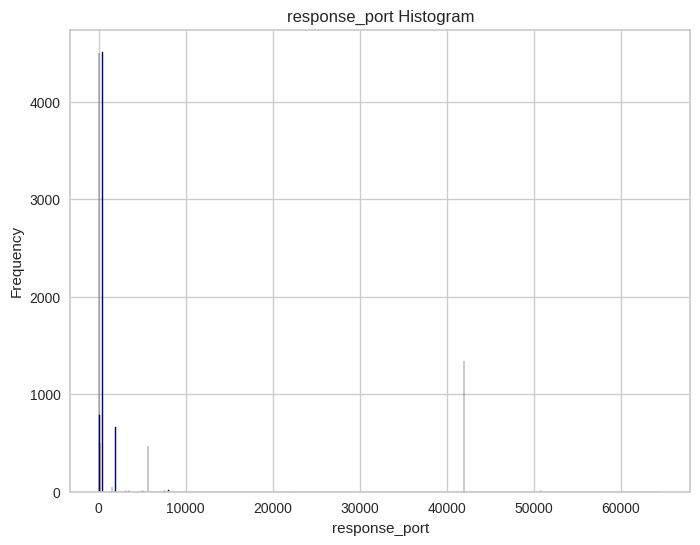

In [ ]:
#lihat outlier menggunakan histogram
import matplotlib.pyplot as plt

frequency = train_selected_features['response_port'].value_counts().reset_index()
frequency.columns = ['response_port', 'Frequency']

plt.figure(figsize=(8, 6))
plt.hist(train_selected_features['response_port'], bins=1000, color='blue', edgecolor='black')

plt.xlabel('response_port')
plt.ylabel('Frequency')
plt.title('response_port Histogram')

plt.show()

In [ ]:
#train_selected_features.corr() --> sejauh ini ga perlu ngapusin kolom lagi walaupun ada alert highly correlated karena kolom-kolom yang digunakan sudah dipilih yang signifikan untuk memprediksi cyber security

#MODELLING

##GBC

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Preparasi
X = final_df.drop(columns=['traffic'])
y = final_df['traffic']

In [ ]:
#Base Model
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1) #hyperparameter tuning potential
for depth in range(1, 11):
  tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state = 1)
  if tree_classifier.fit(X,y).tree_.max_depth<depth:
    break
  score = np.mean(cross_val_score(tree_classifier,X,y,scoring='accuracy', cv=crossvalidation, n_jobs=1))
  print("Depth: %d, Score: %.2f" % (depth, score))

Depth: 1, Score: 0.20
Depth: 2, Score: 0.22
Depth: 3, Score: 0.23
Depth: 4, Score: 0.25
Depth: 5, Score: 0.28
Depth: 6, Score: 0.29
Depth: 7, Score: 0.32
Depth: 8, Score: 0.34
Depth: 9, Score: 0.38
Depth: 10, Score: 0.41


In [ ]:
#GBC dengan Dibagi ke 2 Sesi
# Tahap 1: Cari parameter terbaik untuk max_depth, subsample, dan n_estimators
param_grid_stage1 = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [1, 3, 5],
    'subsample': [0.5, 0.75, 1],
    'random_state': [1]  # Tetapkan random_state untuk hasil yang dapat direproduksi
}
GBC = GradientBoostingClassifier()
grid_search_stage1 = GridSearchCV(estimator=GBC, param_grid=param_grid_stage1, scoring='accuracy', n_jobs=-1, cv=crossvalidation)
grid_search_stage1.fit(X, y)
# Parameter terbaik dari tahap 1
best_params_stage1 = grid_search_stage1.best_params_
print("Best parameters from stage 1:", best_params_stage1)

# Tahap 2: Gunakan parameter terbaik dari tahap 1 untuk mencari learning_rate
param_grid_stage2 = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [best_params_stage1['n_estimators']],
    'max_depth': [best_params_stage1['max_depth']],
    'subsample': [best_params_stage1['subsample']],
    'random_state': [1]  # Tetapkan random_state yang sama
}
GBC_stage2 = GradientBoostingClassifier()
grid_search_stage2 = GridSearchCV(estimator=GBC_stage2, param_grid=param_grid_stage2, scoring='accuracy', n_jobs=-1, cv=crossvalidation)
grid_search_stage2.fit(X, y)
# Parameter terbaik dari tahap 2
best_params_stage2 = grid_search_stage2.best_params_
print("Best parameters from stage 2:", best_params_stage2)
print("Best score from stage 2:", grid_search_stage2.best_score_)

In [ ]:
#GBC Tanpa Dibagi ke 2 Sesi
GBC = GradientBoostingClassifier()
search_grid = {'n_estimators': [500,1000,2000], 'learning_rate':[.001, 0.01, .1], 'max_depth':[1,3,5], 'subsample': [.5, .75, 1], 'random_state': [1]}
search = GridSearchCV(estimator = GBC, param_grid = search_grid, scoring = 'accuracy', n_jobs = 1, cv = crossvalidation)

search.fit(X,y)
print(search.best_params_)
print(search.best_score_)

##Extra Tree Classifier

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

##PYCARET

In [ ]:
cat_features = ['response_port', 'flow_duration', 'forward_packets_per_sec', 'flow_packets_per_sec', 'down_up_ratio', 'flow_SYN_flags', 'flow_RST_flags', 'forward_PSH_flags', 'backward_PSH_flags', 'forward_URG_flags', 'forward_pkts_payload', 'backward_pkts_payload', 'flow_pkts_payload', 'forward_iat', 'payload_bytes_per_sec', 'forward_subflow_bytes', 'forward_bulk_bytes', 'backward_bulk_bytes', 'forward_bulk_packets', 'backward_bulk_rate', 'active', 'forward_initial_window_size', 'forward_last_window_size', 'origin_host_encoded', 'response_host_encoded']
experiment = setup(final_df, target = 'traffic')
best_model = compare_models()

,Description,Value
0,Session id,3761
1,Target,traffic
2,Target type,Multiclass
3,Target mapping,"Background: 0, Benign: 1, Bruteforce: 2, Bruteforce-XML: 3, Probing: 4, XMRIGCC CryptoMiner: 5"
4,Original data shape,"(60000, 26)"
5,Transformed data shape,"(60000, 26)"
6,Transformed train set shape,"(42000, 26)"
7,Transformed test set shape,"(18000, 26)"
8,Categorical features,25
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8333,0.9675,0.8333,0.8298,0.8307,0.7999,0.8004,8.5520
rf,Random Forest Classifier,0.8090,0.9603,0.8090,0.8058,0.8040,0.7708,0.7725,15.1500
xgboost,Extreme Gradient Boosting,0.7562,0.9456,0.7562,0.7487,0.7457,0.7074,0.7106,9.0910
knn,K Neighbors Classifier,0.7355,0.9129,0.7355,0.6976,0.6985,0.6827,0.6898,2.9060
lightgbm,Light Gradient Boosting Machine,0.7316,0.9359,0.7316,0.7271,0.7145,0.6779,0.6841,20.2780
dt,Decision Tree Classifier,0.6294,0.7777,0.6294,0.6226,0.6257,0.5553,0.5555,1.3740
gbc,Gradient Boosting Classifier,0.5077,0.0000,0.5077,0.4946,0.4803,0.4093,0.4159,102.1800
ada,Ada Boost Classifier,0.3196,0.0000,0.3196,0.3416,0.3178,0.1835,0.1856,4.2920
lda,Linear Discriminant Analysis,0.2136,0.0000,0.2136,0.2066,0.1970,0.0564,0.0578,0.4750
lr,Logistic Regression,0.2130,0.0000,0.2130,0.2053,0.1952,0.0556,0.0571,1.2010


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
test_for_training.head()

,response_port,flow_duration,forward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,forward_URG_flags,...,forward_subflow_bytes,forward_bulk_bytes,backward_bulk_bytes,forward_bulk_packets,backward_bulk_rate,active,forward_initial_window_size,forward_last_window_size,origin_host_encoded,response_host_encoded
0,443,1.738424,8.628505,16.681776,0.885699,0.908392,0.504275,6.871419,3.00000,0.001475,...,564.5,0.000000,0.000000,0.000000,0.000000e+00,1.738440e+06,29200.0,80.000000,53460,348
1,5678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.64815,0.001475,...,153.0,0.000000,6830.053375,0.000000,5.743511e+06,0.000000e+00,0.0,0.000000,389,9150
2,53,8.998870,80.446972,3361.688141,1.000000,0.000000,0.000000,0.000000,0.00000,0.001475,...,72.0,16.542931,0.000000,0.030429,0.000000e+00,2.486110e+04,0.0,4532.617825,45748,47524
3,443,8.998870,1694.462380,88.956056,0.885699,2.000000,1.000000,6.871419,7.00000,0.000000,...,839.0,0.000000,4585.000000,0.000000,1.544649e+07,2.697961e+05,29200.0,4532.617825,45748,25033
4,443,0.326490,30.628816,70.446278,1.300000,0.908392,1.000000,3.000000,7.00000,0.000000,...,835.0,16.542931,4585.000000,0.000000,5.211622e+07,7.188082e+05,29200.0,402.000000,45748,25033


In [ ]:
predict_model(best_model, final_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9525,0.9971,0.9525,0.9524,0.9524,0.9430,0.9431


,response_port,flow_duration,forward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,forward_URG_flags,...,forward_bulk_packets,backward_bulk_rate,active,forward_initial_window_size,forward_last_window_size,origin_host_encoded,response_host_encoded,traffic,prediction_label,prediction_score
0,0.0,-0.677583,-0.758512,-0.615617,0.732951,2.139421,1.584303,-0.600242,-0.380092,-0.623884,...,-0.741051,1.512756,-0.814934,-0.596758,0.0,-1.021097,0.0,Benign,Benign,1.00
1,0.0,1.477153,-0.758870,1.720209,0.732951,-0.467416,1.584303,-0.600242,-0.380092,-0.623884,...,-0.741051,1.512756,-0.764215,-0.596758,0.0,-1.021097,0.0,Benign,Background,0.47
2,0.0,-0.677020,1.369743,1.720209,-1.364347,-0.467416,1.584303,-0.600242,-0.380092,-0.623884,...,1.349434,-0.661045,-0.039634,-0.596758,0.0,0.979339,0.0,Benign,Benign,1.00
3,0.0,-0.677176,1.369743,1.720209,0.732951,-0.467416,1.584303,1.665994,-0.380092,1.602863,...,-0.741051,1.512756,-0.254824,-0.596758,0.0,0.979339,0.0,Benign,Benign,1.00
4,0.0,1.477153,-0.712538,-0.559525,0.732951,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,-0.741051,-0.661045,-0.454916,-0.596758,0.0,-1.021097,0.0,Benign,Benign,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.964733,-0.760643,-0.618217,0.732951,-0.467416,-0.631193,1.665994,-0.380092,-0.623884,...,1.349434,1.512756,-0.500545,-0.596758,0.0,-1.021097,0.0,XMRIGCC CryptoMiner,XMRIGCC CryptoMiner,1.00
59996,0.0,-0.677508,-0.755841,-0.612358,0.732951,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,1.349434,-0.661045,-0.711623,-0.596758,0.0,-1.021097,0.0,XMRIGCC CryptoMiner,XMRIGCC CryptoMiner,0.96
59997,0.0,0.443867,-0.718027,-0.566222,-1.364347,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,1.349434,1.512756,0.022818,-0.596758,0.0,-1.021097,0.0,XMRIGCC CryptoMiner,XMRIGCC CryptoMiner,1.00
59998,0.0,1.477153,-0.748230,-0.603072,0.181419,-0.467416,-0.631193,1.665994,-0.380092,-0.623884,...,-0.741051,-0.661045,-0.595707,1.675721,0.0,-1.021097,0.0,XMRIGCC CryptoMiner,XMRIGCC CryptoMiner,1.00


In [ ]:
save_model(best_model, model_name = "extra_tress_classifier_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
    

In [ ]:
model = load_model('extra_tress_classifier_model')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
prediction_df = model.predict(test_for_training)

In [ ]:
prediction_df

,traffic
0,Bruteforce-XML
1,Bruteforce-XML
2,Bruteforce-XML
3,Bruteforce-XML
4,Bruteforce
...,...
138800,Probing
138801,Bruteforce-XML
138802,Bruteforce-XML
138803,Bruteforce-XML


In [ ]:
#gabungkan prediction_df dengan test_id
prediction_df = pd.concat([test_id, prediction_df], axis = 1)
prediction_df.head()

,id,traffic
0,ClDOIi3yLGMfeRPzAc,Bruteforce-XML
1,C9chsd1cHTOBBHe6Q2,Bruteforce-XML
2,CUOe3U1NC5Nln7cItf,Bruteforce-XML
3,C6QhB04KTRUYOY2rMk,Bruteforce-XML
4,C60oC51SZNEhCXlX6c,Bruteforce


In [ ]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138805 entries, 0 to 138804
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       138805 non-null  object
 1   traffic  138805 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB


In [ ]:
#EXPORT PREDICTION
prediction_df.to_csv('prediction_df.csv', index = False)

#**TIFFANY**

In [ ]:
import pandas as pd
import numpy as np

#load dataset
final_df = pd.read_csv('final_df.csv', sep=',')
final_df.head()

#undersampling kelas "Benign", "Background", "Bruteforce", dan "Bruteforce-XML" terbanyak ke 10k
#pisahkan masing-masing kelas
benign_df = final_df[final_df['traffic'] == 'Benign']
background_df = final_df[final_df['traffic'] == 'Background']
probing_df = final_df[final_df['traffic'] == 'Probing']
bruteforce_df = final_df[final_df['traffic'] == 'Bruteforce']
bruteforce_xml_df = final_df[final_df['traffic'] == 'Bruteforce-XML']
xmr_gcc_df = final_df[final_df['traffic'] == 'XMRIGCC CryptoMiner']

# Undersampling masing-masing kelas ke 10k
benign_sampled = benign_df.sample(10000, random_state=42)
background_sampled = background_df.sample(10000, random_state=42)
probing_sampled = probing_df.sample(10000, random_state=42)
bruteforce_sampled = bruteforce_df.sample(10000, random_state=42)
bruteforce_xml_sampled = bruteforce_xml_df.sample(10000, random_state=42)
xmr_gcc_sampled = xmr_gcc_df.sample(10000, random_state=42)

#Gabungkan kembali dataset
final_df = pd.concat([benign_sampled, background_sampled, probing_sampled, bruteforce_sampled, bruteforce_xml_sampled, xmr_gcc_sampled])
final_df.reset_index(drop=True, inplace=True)

#Modelling
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

#Preparasi
X = final_df.drop(columns=['traffic'])
y = final_df['traffic']

#Base Model
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1) #hyperparameter tuning potential
for depth in range(1, 11):
  tree_classifier = tree.DecisionTreeClassifier(max_depth=depth, random_state = 1)
  if tree_classifier.fit(X,y).tree_.max_depth<depth:
    break
  score = np.mean(cross_val_score(tree_classifier,X,y,scoring='accuracy', cv=crossvalidation, n_jobs=1))
  print("Depth: %d, Score: %.2f" % (depth, score))

# Tahap 1: Cari parameter terbaik untuk max_depth, subsample, dan n_estimators
param_grid_stage1 = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [1, 3, 5],
    'subsample': [0.5, 0.75, 1],
    'random_state': [1]  # Tetapkan random_state untuk hasil yang dapat direproduksi
}
GBC = GradientBoostingClassifier()
grid_search_stage1 = GridSearchCV(estimator=GBC, param_grid=param_grid_stage1, scoring='accuracy', n_jobs=-1, cv=crossvalidation)
grid_search_stage1.fit(X, y)
# Parameter terbaik dari tahap 1
best_params_stage1 = grid_search_stage1.best_params_
print("Best parameters from stage 1:", best_params_stage1)

# Tahap 2: Gunakan parameter terbaik dari tahap 1 untuk mencari learning_rate
param_grid_stage2 = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [best_params_stage1['n_estimators']],
    'max_depth': [best_params_stage1['max_depth']],
    'subsample': [best_params_stage1['subsample']],
    'random_state': [1]  # Tetapkan random_state yang sama
}
GBC_stage2 = GradientBoostingClassifier()
grid_search_stage2 = GridSearchCV(estimator=GBC_stage2, param_grid=param_grid_stage2, scoring='accuracy', n_jobs=-1, cv=crossvalidation)
grid_search_stage2.fit(X, y)
# Parameter terbaik dari tahap 2
best_params_stage2 = grid_search_stage2.best_params_
print("Best parameters from stage 2:", best_params_stage2)
print("Best score from stage 2:", grid_search_stage2.best_score_)

,response_port,flow_duration,forward_packets_per_sec,flow_packets_per_sec,down_up_ratio,flow_SYN_flags,flow_RST_flags,forward_PSH_flags,backward_PSH_flags,forward_URG_flags,...,forward_bulk_bytes,backward_bulk_bytes,forward_bulk_packets,backward_bulk_rate,active,forward_initial_window_size,forward_last_window_size,origin_host_encoded,response_host_encoded,traffic
0,0.0,-0.677144,1.369743,-0.620455,0.732951,-0.467416,-0.631193,-0.600242,2.630944,-0.623884,...,-0.688400,-0.695891,-0.741051,-0.661045,-0.210481,-0.596758,0.0,-1.021097,0.0,Benign
1,0.0,-0.676548,-0.724555,1.720209,0.732951,2.139421,1.584303,-0.600242,2.630944,-0.623884,...,-0.688400,-0.695891,1.349434,-0.661045,0.608722,1.675721,0.0,0.979339,0.0,Benign
2,0.0,-0.677203,1.369743,-0.562035,0.732951,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,1.452643,1.437006,-0.741051,-0.661045,-0.291984,1.675721,0.0,0.979339,0.0,Benign
3,0.0,-0.676789,-0.765257,-0.623846,0.732951,-0.467416,-0.631193,-0.600242,-0.380092,1.602863,...,1.452643,-0.695891,-0.741051,1.512756,0.277948,-0.596758,0.0,-1.021097,0.0,Benign
4,0.0,-0.677341,-0.712200,-0.559112,-1.364347,-0.467416,-0.631193,-0.600242,-0.380092,-0.623884,...,-0.688400,1.437006,-0.741051,-0.661045,-0.481081,-0.596758,0.0,-1.021097,0.0,Benign
